In [1]:
%autosave 20
import math 
import pandas as pd

import numpy as np
# import matplotlib.pyplot as plt

# from matplotlib.colors import ListedColormap
# from sklearn.utils import shuffle
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Autosaving every 20 seconds


In [2]:
list_sensor=pd.read_csv("list_sensor1.csv", delimiter=",",names=["id","factor"])
list_units=pd.read_csv("list_units1.csv", delimiter=",",names=["id","factor"]) 
list_type=pd.read_csv("list_types1.csv", delimiter=",",names=["id","factor"]) 
# df=pd.read_csv("Sample dataset values1.csv",delimiter=",", 
#                     names=["packet_no","Sensor","Type","Units","time","Flag","Value","Key"])
# df = shuffle(df)
# df.to_csv("Sample dataset values1.csv",mode="w",index=False)
df=pd.read_csv("Sample dataset values1.csv")
df.head(5)
df.shape
total_row=df.shape[0]
trial_row=int(total_row-(total_row*0.25))
print("total rows")
print(trial_row)

,Sensor,Type,Units,time,Flag,Value
0,PER_AIRMON_MESH301245,PM2.5,ugm -3,13/05/2020 11:27,0.0,3.140000
1,PER_AIRMON_MESH301245,PM10,ugm -3,16/05/2020 15:42,0.0,8.500000
2,PER_EMOTE_1309,Sound,db,12/05/2020 14:57,0.0,66.000000
3,PER_EMOTE_1309,CO,ugm -3,2020-05-19 00:53:20,0.0,376.326817
4,PER_AIRMON_MESH301245,PM1,ugm -3,16/05/2020 17:12,0.0,1.290000


(206563, 6)

total rows
154922


In [3]:
def factorize(obj,obj_list,table,data):
    print(data[obj].unique())
    data_s=pd.DataFrame(data[obj].unique())
    
    new_sensor = data_s[~data_s[0].isin(obj_list.id)]
    ns=[]
    if(len(new_sensor)>0):
        l=len(obj_list)
        for s in new_sensor[0]:
            n=[s,l]
            l=l+1
            ns.append(n)
        ns=pd.DataFrame(ns,columns=["id","factor"])
        ns.to_csv(table,mode='a', header=False,index=False)

    obj_list=pd.read_csv(table,delimiter=",",names=["id","factor"])
    l=len(obj_list)
    for i in range(0,l):
        data.loc[data[obj]==obj_list.id[i],obj]=obj_list.factor[i]
    print(data[obj].unique())

In [4]:
factorize('Sensor',list_sensor,'list_sensor1.csv',df)

['PER_AIRMON_MESH301245' 'PER_EMOTE_1309' 'PER_AIRMON_MESH1911150']
[2 1 0]


In [5]:
factorize('Type',list_type,'list_types1.csv',df)

['PM2.5' 'PM10' 'Sound' 'CO' 'PM1' 'PM 4' 'NO' 'NO2' 'Humidity'
 'Temperature' 'O3' 'Pressure']
[ 3  4  5  2  8  0 10  7  6  1  9 11]


In [6]:
factorize('Units',list_units,'list_units1.csv',df)

['ugm -3' 'db' '%' 'Celsius' 'ppb' 'hpa']
[0 2 3 1 4 5]


In [7]:
df.loc[df['Flag']==False,'Flag']=0
df.loc[df['Flag']==True,'Flag']=1

In [8]:
x=['Sensor', 'Type', 'Units','Value']
y=['Flag']
train=df.loc[1:trial_row,]
test=df.loc[trial_row+1:total_row,]
train.shape
test.shape

(154922, 6)

(51640, 6)

In [9]:
print(train['Flag'].value_counts())
print(test['Flag'].value_counts())

0.0    154148
1.0       774
Name: Flag, dtype: int64
0.0    51361
1.0      279
Name: Flag, dtype: int64


In [10]:
x_train,y_train,x_test,y_test = train[x],train[y],test[x],test[y]

In [11]:
train['Flag'].value_counts()
test['Flag'].value_counts()

0.0    154148
1.0       774
Name: Flag, dtype: int64

0.0    51361
1.0      279
Name: Flag, dtype: int64

In [12]:
#confusion Matrix
def ConfusionMatrix(x,y):
    a = confusion_matrix(x,y)
    print(a)
    b = (a[0][0]+a[1][1])/(a[1][1]+a[0][1]+a[0][0]+a[1][0])
    return round(b*100,2)

In [13]:
#Decision Tree
decision = DecisionTreeClassifier(max_depth=5).fit(x_train, y_train)
decision_yhat = decision.predict(x_test)

# type(decision_yhat)
# print("zeros",(decision_yhat == 0).sum())
# print("ones",(decision_yhat == 1).sum())

print(decision.score(x_test,y_test))

decision_acc= ConfusionMatrix(decision_yhat,y_test)
print(decision_acc)




1.0
[[51361     0]
 [    0   279]]
100.0


[Text(200.88000000000002, 181.2, 'X[3] <= 0.001\ngini = 0.01\nsamples = 154922\nvalue = [154148, 774]'),
 Text(133.92000000000002, 108.72, 'X[2] <= 2.0\ngini = 0.01\nsamples = 778\nvalue = [4, 774]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 774\nvalue = [0, 774]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 154144\nvalue = [154144, 0]')]

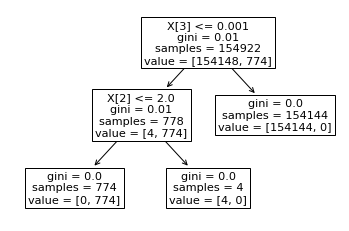

In [15]:
decision=tree.DecisionTreeClassifier()
tree.plot_tree(decision.fit(x_train,y_train)) 